# MULTICLASS CLASSIFICATION 



In [ ]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8000, 28, 28)
(8000,)
(2000, 28, 28)
(2000,)


In [ ]:
#print the unique values in Y_train
unique  = np.unique(Y_train)
print(unique)
classes = ["T-shirt/top ","  Trouser"," Pullover","Dress ","Coat ","Sandal  ","Shirt ","Sneaker "," Bag" , "Ankle boot"]


[0 1 2 3 4 5 6 7 8 9]


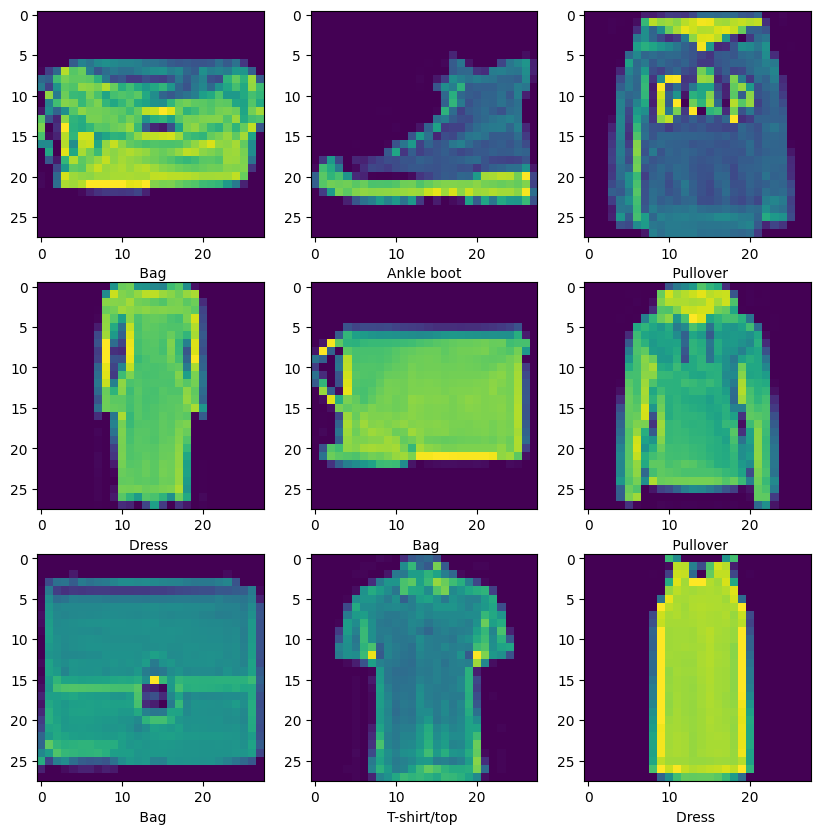

In [ ]:
#randomly print 9 images with [label]
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(10,10))
for i in range(9):
  index = np.random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])#edit1__plot_image_here_
  plt.xlabel(classes[Y_train[index]])#edit2__add_label_here_
  
  


###These number denotes the respective object
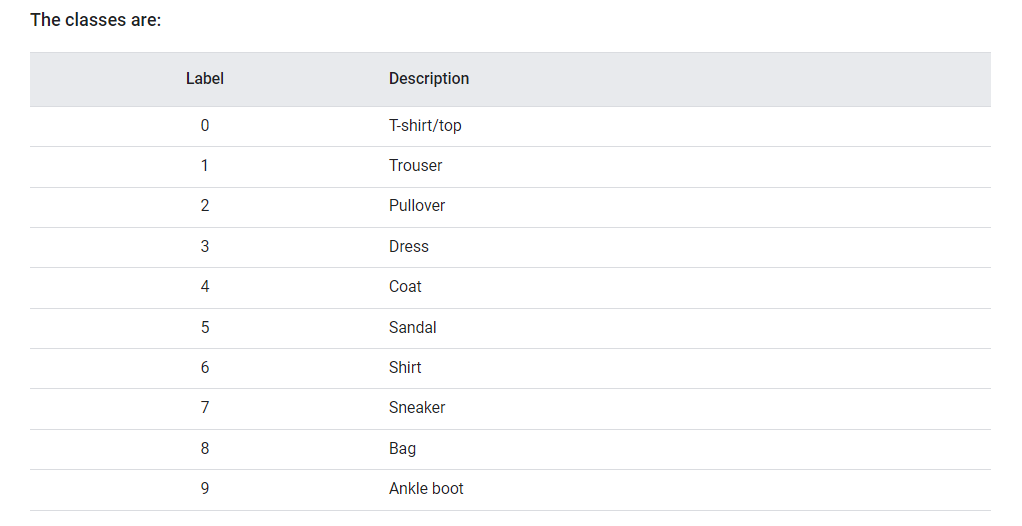

In [ ]:
# Find the count of each type of class
arr=[]
for i in range(10):
  arr.append(np.count_nonzero(Y_train==i))
arr


[803, 806, 800, 785, 829, 809, 796, 797, 768, 807]

In [ ]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(60, activation = 'relu'))
#model.add(tf.keras.layers.Dense(40, activation = 'relu'))

#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
# Compiling the model
#add the lr and loss in the given space
from tensorflow.keras import datasets, layers, models

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001),
                        loss = 'sparse_categorical_crossentropy'
                        ,metrics=['accuracy'])

In [ ]:
#Lets analyse the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 60)                7740      
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                                 
Total params: 108,830
Trainable params: 108,830
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [ ]:
""" 
[objective] Write the answer here: 
"""

' \n[objective] Write the answer here: \n'

In [ ]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train,Y_train,validation_split=0.2,epochs =100)

Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 14.0869 - accuracy: 0.5505 - val_loss: 5.4470 - val_accuracy: 0.6175
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 4.0083 - accuracy: 0.6377 - val_loss: 3.5281 - val_accuracy: 0.6263
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 2.3845 - accuracy: 0.6277 - val_loss: 2.4536 - val_accuracy: 0.5962
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 1.7626 - accuracy: 0.6472 - val_loss: 2.0178 - val_accuracy: 0.6250
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 1.4837 - accuracy: 0.6661 - val_loss: 1.8434 - val_accuracy: 0.6463
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 1.3121 - accuracy: 0.6805 - val_loss: 1.6919 - val_accuracy: 0.6413
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 1.2067 - accuracy: 0.6922 - val_loss: 1.6145 - val_accuracy: 0.637

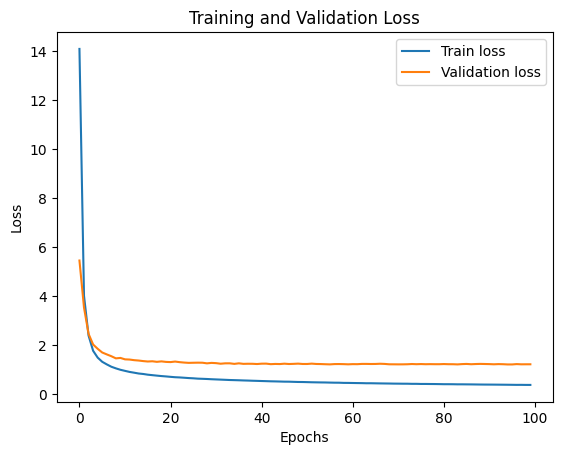

In [ ]:
#lets plot the losses
plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


###What do you infer from the graph of losses above?

in the starting few epochs both train as well as test dataset are working same so in good fit condition but only for initial few epochs but in most of the epochs our model is working good with the training dataset than  the test dataset rather than we should say it is hard to model the test dataset over train dataset as value of loss for training dataset is less than that of test dataset so model is "underfitting"

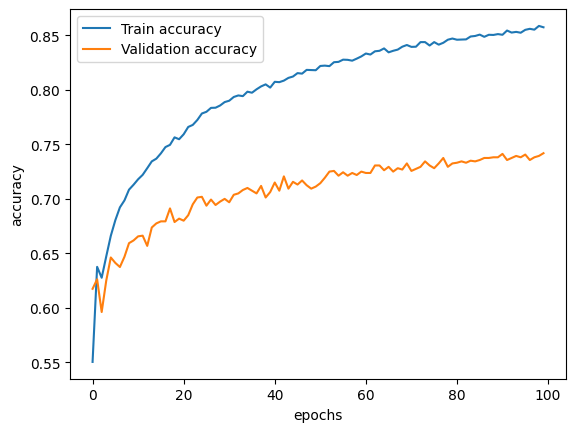

In [ ]:
#plotting the accuracy of the traing
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

###What do you infer from the graph of accuracies above?

when we are implementing model on train dataset accuracy is high in predicting than when we implement model on validation (test  dataset)


In [ ]:
#Checking the prediction

y_pred = model.predict(X_test)
y_pred.shape

63/63 [==============================] - 0s 2ms/step


(2000, 10)

In [ ]:
y_classes = [np.argmax(data) for data in y_pred]
y_classes[:]

[2,
 4,
 6,
 1,
 4,
 5,
 8,
 0,
 9,
 3,
 4,
 7,
 2,
 8,
 4,
 7,
 8,
 9,
 3,
 5,
 9,
 3,
 5,
 9,
 8,
 1,
 0,
 9,
 7,
 8,
 0,
 0,
 4,
 7,
 7,
 9,
 1,
 2,
 7,
 5,
 4,
 6,
 0,
 8,
 0,
 9,
 6,
 2,
 2,
 7,
 4,
 1,
 3,
 9,
 6,
 5,
 7,
 9,
 0,
 5,
 4,
 3,
 7,
 9,
 6,
 7,
 7,
 1,
 1,
 6,
 7,
 9,
 5,
 0,
 0,
 7,
 6,
 2,
 0,
 7,
 7,
 8,
 1,
 3,
 2,
 3,
 0,
 1,
 7,
 2,
 1,
 6,
 1,
 0,
 7,
 5,
 9,
 2,
 9,
 8,
 4,
 0,
 9,
 1,
 5,
 5,
 7,
 8,
 7,
 1,
 9,
 4,
 6,
 1,
 8,
 4,
 0,
 6,
 9,
 8,
 1,
 9,
 4,
 7,
 8,
 4,
 8,
 3,
 9,
 2,
 6,
 6,
 9,
 7,
 0,
 2,
 0,
 9,
 8,
 1,
 9,
 3,
 2,
 7,
 4,
 7,
 9,
 5,
 2,
 1,
 8,
 8,
 9,
 8,
 0,
 8,
 3,
 8,
 0,
 8,
 6,
 4,
 3,
 1,
 8,
 7,
 4,
 7,
 5,
 9,
 7,
 6,
 1,
 7,
 8,
 9,
 0,
 5,
 5,
 8,
 1,
 5,
 0,
 8,
 1,
 2,
 2,
 3,
 7,
 7,
 8,
 2,
 4,
 3,
 6,
 6,
 2,
 4,
 7,
 4,
 5,
 1,
 3,
 3,
 8,
 2,
 8,
 4,
 8,
 4,
 2,
 5,
 3,
 8,
 7,
 4,
 0,
 1,
 5,
 0,
 1,
 1,
 9,
 4,
 7,
 7,
 4,
 6,
 8,
 9,
 7,
 5,
 9,
 1,
 5,
 4,
 9,
 7,
 7,
 0,
 8,
 6,
 6,
 8,
 0,
 3,
 8,
 2,
 7,
 6,


In [ ]:
Y_test[:]

array([4, 4, 4, ..., 9, 1, 9], dtype=uint8)

In [ ]:
# Calculate the R2score for the test data
from sklearn.metrics import r2_score
R2_SCORE = r2_score(Y_test,y_classes)
R2_SCORE


0.6429444282525367

In [ ]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [ ]:
# print the shape of kernel of other layers as well
model.layers[2].kernel.shape
model.layers[3].kernel.shape

TensorShape([60, 10])

In [ ]:
# Does that satisfied the matrix multiplication math discussed earlier

yes